## Classification with Deep Learning Neural Networks

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv1D,MaxPooling1D,LSTM,Embedding,Input
from keras.optimizers import SGD
from keras.models import Model
import numpy as np
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
np.random.seed(7)
from statistics import median
#from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.cross_validation import train_test_split
import seaborn as sns
%pylab inline
sns.set_style('white')
from numpy import mean
import time

Populating the interactive namespace from numpy and matplotlib


c:\users\naga kiran\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['median', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Classification data from the ML Hackathon data

In [12]:
import pandas as pd 
data=pd.read_csv('train_data.csv',encoding='iso-8859-1')
test=pd.read_csv('test_data.csv',encoding='iso-8859-1')

Enumerating the Categorical values with numerical values

In [13]:
Fcase=set(list(data.target))
Fcase1=dict([(case,i) for i,case in enumerate(Fcase)])
Fcase1

{0: 0, 1: 1, 2: 2}

Sampling data to 1000 samples to reduce Computations

In [14]:
data=data[:1000]

In [15]:
len(data)

1000

Target columns distribution in the Dataset

In [16]:
data1=data[data.target==0]
data2=data[data.target==1]
data3=data[data.target==2]

print("Percentage of 0's in data",len(data1)/len(data))
print("Percentage of 1's in data",len(data2)/len(data))
print("Percentage of 2's in data",len(data3)/len(data))


Percentage of 0's in data 0.578
Percentage of 1's in data 0.2
Percentage of 2's in data 0.222


In [17]:
columns=data.columns

In [18]:
print(columns)

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5',
       'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12',
       'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18',
       'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22',
       'cat_23', 'target'],
      dtype='object')


In [19]:
pd.unique(data.cat_11)

array([0, 1], dtype=int64)

In [20]:
Cat_columns=columns[19:42]
Cont_columns=columns[1:18]

Categorical Value Attributes distribution in the Train Dataset

In [21]:
for i in Cat_columns:
    print(i,"-",len(pd.unique(data[i])),"-  Max Value-",max(data[i]),"  -   Countof Max- %0.4f"%(len(data[data[i]==max(data[i])])/len(data)),"  -   Countof Min- %0.5f"%(len(data[data[i]==min(data[i])])/len(data)))

cat_1 - 3 -  Max Value- 3   -   Countof Max- 0.5860   -   Countof Min- 0.37700
cat_2 - 24 -  Max Value- 59   -   Countof Max- 0.0010   -   Countof Min- 0.13500
cat_3 - 6 -  Max Value- 11   -   Countof Max- 0.0010   -   Countof Min- 0.77700
cat_4 - 1 -  Max Value- 0   -   Countof Max- 1.0000   -   Countof Min- 1.00000
cat_5 - 1 -  Max Value- 0   -   Countof Max- 1.0000   -   Countof Min- 1.00000
cat_6 - 1 -  Max Value- 0   -   Countof Max- 1.0000   -   Countof Min- 1.00000
cat_7 - 2 -  Max Value- 5   -   Countof Max- 0.0010   -   Countof Min- 0.99900
cat_8 - 1 -  Max Value- 0   -   Countof Max- 1.0000   -   Countof Min- 1.00000
cat_9 - 2 -  Max Value- 1   -   Countof Max- 0.1500   -   Countof Min- 0.85000
cat_10 - 2 -  Max Value- 2   -   Countof Max- 0.0010   -   Countof Min- 0.99900
cat_11 - 2 -  Max Value- 1   -   Countof Max- 0.0010   -   Countof Min- 0.99900
cat_12 - 1 -  Max Value- 0   -   Countof Max- 1.0000   -   Countof Min- 1.00000
cat_13 - 3 -  Max Value- 9   -   Countof Max- 

Contineous Variable Attributes Distribution

In [22]:
for i in Cont_columns:
    print( i,"  Values ranging from   ",min(data[i]),"-",mean(data[i]),"-",max(data[i]))

cont_1   Values ranging from    0 - 19.01 - 9722
cont_2   Values ranging from    0 - 642.374 - 11664
cont_3   Values ranging from    0 - 630.302 - 46375
cont_4   Values ranging from    0.0 - 0.1567 - 1.0
cont_5   Values ranging from    0.0 - 0.15769 - 1.0
cont_6   Values ranging from    0.0 - 0.06644 - 1.0
cont_7   Values ranging from    0.0 - 0.06438 - 1.0
cont_8   Values ranging from    0.0 - 0.80042 - 1.0
cont_9   Values ranging from    0.0 - 0.02008 - 1.0
cont_10   Values ranging from    0.0 - 0.02963 - 1.0
cont_11   Values ranging from    0.0 - 0.7734 - 1.0
cont_12   Values ranging from    0.0 - 0.02666 - 1.0
cont_13   Values ranging from    0.0 - 0.61387 - 1.0
cont_14   Values ranging from    0.0 - 0.00693 - 0.5
cont_15   Values ranging from    0.0 - 0.1575 - 1.0
cont_16   Values ranging from    0.0 - 0.15721 - 1.0
cont_17   Values ranging from    0.0 - 0.06702 - 1.0


In [23]:
Cat_columns1=[i for i in Cat_columns if len(pd.unique(data[i]))>1]

In [24]:
Cat_columns1

['cat_1',
 'cat_2',
 'cat_3',
 'cat_7',
 'cat_9',
 'cat_10',
 'cat_11',
 'cat_13',
 'cat_16',
 'cat_20',
 'cat_21',
 'cat_22',
 'cat_23']

In [25]:
data.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2


Enumerating the Categorical Values with the Numerical integers

In [27]:
Categ_columns1={}
for j in Cat_columns1:
    dictionary=dict([(value,i) for i,value in enumerate(np.unique(data[j]))])
    a=np.asmatrix(data[j].apply(lambda x: dictionary[x]).values).T
    Categ_columns1[j]=a

In [28]:
list_cat1=[Categ_columns1[i] for i in Cat_columns1]

In [29]:
Categorical_features1=np.concatenate(list_cat1,axis=1)
Categorical_features1.shape

(1000, 13)

Applying the Min Max regularization on the converted Categorical values

In [30]:
Categ=pd.DataFrame(Categorical_features1)
Categorical_features1=Categ.apply(lambda x:(x - x.min()) / (x.max() - x.min())).values

In [31]:
Categorical_features1.shape

(1000, 13)

In [32]:
Cat_columns[:19]

Index(['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8',
       'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15',
       'cat_16', 'cat_17', 'cat_18', 'cat_19'],
      dtype='object')

In [33]:
Cat_columns[19:23]

Index(['cat_20', 'cat_21', 'cat_22', 'cat_23'], dtype='object')

In [34]:
Categ_columns={}
t1=time.time()
for i in Cat_columns[:19]:
    Categ_columns[i]=data[i].apply(lambda x: list(np.binary_repr(x).zfill(6)))
t2=time.time()
t2-t1

0.0860593318939209

In [35]:
t1=time.time()
for i in Cat_columns[19:23]:
    Categ_columns[i]=data[i].apply(lambda x: list(np.binary_repr(x).zfill(12)))
t2=time.time()
t2-t1

0.032019853591918945

In [36]:
t1=time.time()
list_Cat=[sequence.pad_sequences(Categ_columns[col],maxlen=6) for col in Cat_columns[:19]]
t2=time.time()
t2-t1

0.34623003005981445

In [37]:
Categorical_features=np.concatenate((list_Cat),axis=1)
Categorical_features.shape

(1000, 114)

In [38]:
data4 = data[['cont_3']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [39]:
data4=data[Cont_columns]

Checking the Distributions of contineous variable Attributes

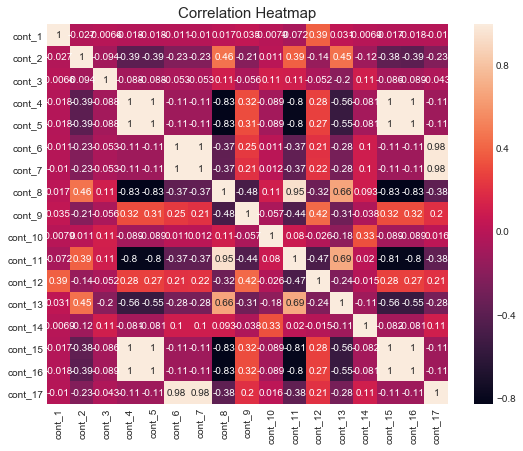

In [40]:
train_data,test_data=train_test_split(data4,test_size=0.1,random_state=50)
corr=train_data.corr()
p = sns.heatmap(data=corr, annot=True)
p.figure.set_size_inches((9,7))
p.set_title('Correlation Heatmap', size=15)
plt.show()

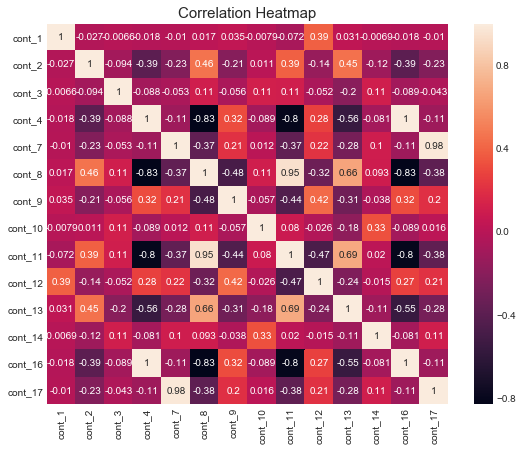

In [41]:
del data4['cont_5']
del data4['cont_6']
del data4['cont_15']

data4 = data4.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


train_data,test_data=train_test_split(data4,test_size=0.1,random_state=50)
corr=train_data.corr()
p = sns.heatmap(data=corr, annot=True)
p.figure.set_size_inches((9,7))
p.set_title('Correlation Heatmap', size=15)
plt.show()

In [42]:
Contineuos_features=data4.values

In [43]:
Contineuos_features.shape

(1000, 14)

In [48]:
Categorical_features1.shape

(1000, 13)

Concatenating the Contineous and Categorical values to feed it to Algorithm

In [49]:
Train_Features=np.concatenate((Contineuos_features,Categorical_features),axis=1)

In [50]:
Train_Features.shape

(1000, 128)

In [51]:
Identity_matrix=np.eye(len(np.unique(data.target)))
Train_y=data.target.apply(lambda x: Identity_matrix[x])
Train_y=sequence.pad_sequences(Train_y,maxlen=3)

Neural Network Layers

In [54]:
def Convolution_model1(X_train,y_train):
    _,input_sh=X_train.shape
    _,dim2=y_train.shape
    _,max_review_length=X_train.shape
    model = Sequential()
    model.add(Dense(1200, input_shape=(input_sh,)))
    model.add(Dense(1200,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1200,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1200,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(120,activation='relu'))
    model.add(Dense(120,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(80,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

Calling the Model with the Train data

In [56]:
model=Convolution_model1(Train_Features,Train_y)

Fitting the Train data in the code

In [57]:
model.fit(Train_Features,Train_y,epochs=10)

Epoch 1/10
1000/1000 [==============================] - 7s - loss: 0.9189 - acc: 0.5290     
Epoch 2/10
1000/1000 [==============================] - 3s - loss: 0.6587 - acc: 0.7290     
Epoch 3/10
1000/1000 [==============================] - 3s - loss: 0.5972 - acc: 0.7350     
Epoch 4/10
1000/1000 [==============================] - 3s - loss: 0.5979 - acc: 0.7390     
Epoch 5/10
1000/1000 [==============================] - 3s - loss: 0.6220 - acc: 0.7590     
Epoch 6/10
1000/1000 [==============================] - 3s - loss: 0.5663 - acc: 0.7670     
Epoch 7/10
1000/1000 [==============================] - 4s - loss: 0.5700 - acc: 0.7640     
Epoch 8/10
1000/1000 [==============================] - 3s - loss: 0.5718 - acc: 0.7690     
Epoch 9/10
1000/1000 [==============================] - 3s - loss: 0.5652 - acc: 0.7670     
Epoch 10/10
1000/1000 [==============================] - 3s - loss: 0.5879 - acc: 0.7700     
